In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-06-24 08:53:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-06-24 08:53:50 (139 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

In [ ]:
with open('/tmp/sarcasm.json','r') as f:
  sarcastic_dataset=json.load(f)

In [ ]:
sentences=[]
labels=[]

for item in sarcastic_dataset:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [ ]:
training_size=20000
vocabulary=10001
embedding_dims=16
maxlen=100
truncating='post'
padding='post'


In [ ]:
training_sentences=sentences[:training_size]
testing_sentences=sentences[training_size:]

training_labels=labels[:training_size]
testing_labels=labels[training_size:]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(num_words=vocabulary,oov_token='**OOV**')
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
training_sequence=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequence,maxlen=maxlen,padding=padding,truncating=truncating)

testing_sequence=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequence,maxlen=maxlen,padding=padding,truncating=truncating)

In [ ]:
import numpy as np


In [ ]:
training_padded=np.array(training_padded)
testing_padded=np.array(testing_padded)
training_labels=np.array(training_labels)
testing_labels=np.array(testing_labels)

In [ ]:
epochs=30

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,GlobalAveragePooling1D

model=Sequential()
model.add(Embedding(vocabulary,embedding_dims,input_length=maxlen))
model.add(GlobalAveragePooling1D())


model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(patience=2,monitor='val_loss',mode='min')

In [ ]:
model.fit(training_padded,training_labels,epochs=epochs,validation_data=(testing_padded,testing_labels),callbacks=[early_stop])

Epoch 1/30
625/625 [==============================] - 3s 5ms/step - loss: 0.6693 - accuracy: 0.5750 - val_loss: 0.6121 - val_accuracy: 0.8010
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.4543 - accuracy: 0.8215 - val_loss: 0.4008 - val_accuracy: 0.8264
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3231 - accuracy: 0.8735 - val_loss: 0.3762 - val_accuracy: 0.8313
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2707 - accuracy: 0.8951 - val_loss: 0.3494 - val_accuracy: 0.8512
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2338 - accuracy: 0.9096 - val_loss: 0.3418 - val_accuracy: 0.8572
Epoch 6/30
625/625 [==============================] - 3s 4ms/step - loss: 0.2061 - accuracy: 0.9210 - val_loss: 0.3470 - val_accuracy: 0.8557
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1836 - accuracy: 0.9309 - val_loss: 0.3658 - val_accuracy: 0.8496


In [ ]:
import pandas as pd
losses=pd.DataFrame(model.history.history)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.669250,0.57505,0.612115,0.801014
1,0.454265,0.82150,0.400810,0.826353
2,0.323137,0.87350,0.376177,0.831271
3,0.270729,0.89510,0.349429,0.851245
4,0.233819,0.90955,0.341789,0.857207
5,0.206078,0.92100,0.346950,0.855716
6,0.183606,0.93085,0.365770,0.849605


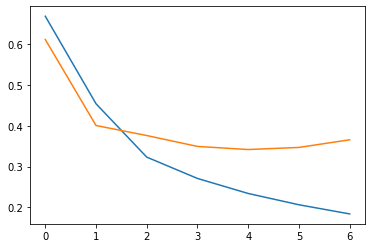

In [ ]:
plt.plot(losses[['loss','val_loss']])

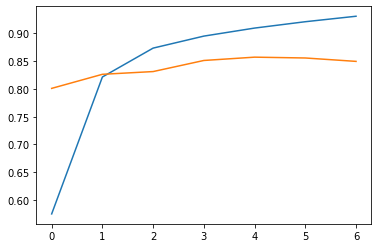

In [ ]:
plt.plot(losses[['accuracy','val_accuracy']])

In [ ]:
rev_word=dict([(value,key) for (key,value) in word_index.items()])

def decd(text):
  return " ".join([rev_word.get(i,'?') for i in text])

In [ ]:
print(decd(training_padded[0]))
print(training_sentences[0])
print(training_labels[0])

former **OOV** store clerk sues over secret 'black **OOV** for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
former versace store clerk sues over secret 'black code' for minority shoppers
0


In [ ]:
model_testing_sentences=['granny starting to fer that the spiders in the garden maybe real','game of thrones season finale showing this sunday night']
model_testing_sequence=tokenizer.texts_to_sequences(model_testing_sentences)
model_testing_padded=pad_sequences(model_testing_sequence,maxlen=maxlen,padding=padding,truncating=truncating)

x=model.predict_classes(testing_padded)

In [ ]:
model.evaluate(testing_padded,testing_labels)

210/210 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8496


[0.3657704293727875, 0.8496050238609314]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(testing_labels,x))

[[3440  339]
 [ 670 2260]]
